In [1]:
from skimage.feature import local_binary_pattern
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

In [2]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA
from skimage.io import imread, imshow
from skimage.transform import  resize
from google.colab import drive
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.filters import prewitt_h,prewitt_v

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from os import listdir
from os.path import isfile, join

mypath = '/content/drive/MyDrive/notebooks /archive-4/Augmented Images/Augmented Images/combined '

#Source: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
image_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
## Define a dictionary named 'image_categories'
image_categories = {'Category':[]
                    ,'Image_Name':[]
                    }
                    ## This list will store the categories of the images.
                    # This list will store the names of the images.

In [6]:

## Iterate through each image filename in the list
for image in image_files:
    if image.startswith('M'):
        image_categories['Category'].append('M')
        image_categories['Image_Name'].append(image)
    elif image.startswith('NM'):
        image_categories['Category'].append('NM')
        image_categories['Image_Name'].append(image)



In [7]:
df = pd.DataFrame(image_categories)

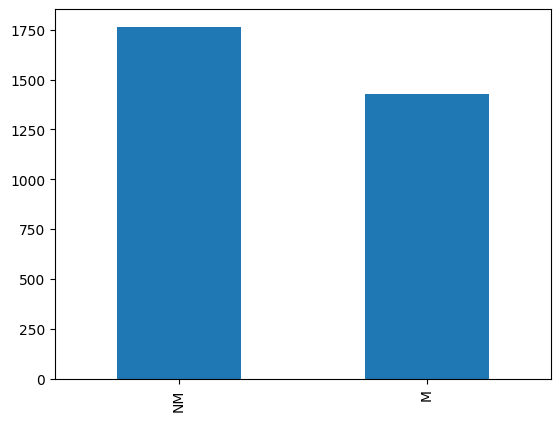

In [8]:
#created a bar plot
df['Category'].value_counts().plot(kind='bar');

In [9]:
#counting the values in category.
df['Category'].value_counts()

NM    1764
M     1428
Name: Category, dtype: int64

In [10]:
Samplesize = 1428  #number of samples that you want
#source: https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class
df = df.groupby('Category', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])

In [11]:
#rechecking the value to make sure it matches.
df['Category'].value_counts()

M     1428
NM    1428
Name: Category, dtype: int64

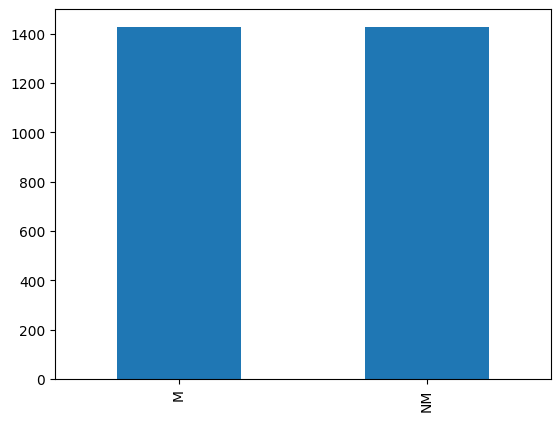

In [12]:
#created a bar plot again
df['Category'].value_counts().plot(kind='bar');

In [13]:
#checking the category feature.
df['Category']

0  2235     M
   2880     M
   3071     M
   2972     M
   1369     M
           ..
1  695     NM
   770     NM
   1152    NM
   164     NM
   640     NM
Name: Category, Length: 2856, dtype: object

In [14]:
## Filter the DataFrame 'df' based on specific categories

df1 = df.loc[(df['Category'] == "M" ) | (df['Category'] == "NM" )]

In [15]:
## Create a dictionary named 'categories'
categories= {'M vs NM': df1,

            }

In [16]:
df1

Category       Image_Name
0 2235        M    M35_01_10.jpg
  2880        M    M33_01_12.jpg
  3071        M    M10_01_10.jpg
  2972        M    M49_02_03.jpg
  1369        M    M52_01_10.jpg
...         ...              ...
1 695        NM   NM81_01_03.jpg
  770        NM   NM43_04_10.jpg
  1152       NM  NM106_01_10.jpg
  164        NM   NM91_02_06.jpg
  640        NM   NM25_01_11.jpg

[2856 rows x 2 columns]

In [17]:
for comparison in categories:
  df = categories[comparison]

  image_list = df['Image_Name'].tolist()
  #print(image_list)

  # type of LBP
  METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
  radius = 1  # distance between central pixels and comparison pixels
  n_points = 8 * radius  # define number of comparison pixels

  # create list for LBP representations
  #lbp_imgs = []
  all_features= []

  # create LBP for each image and add to list
  count = 0
  for i in image_list:
    #print(i)
    count += 1
    print(count, end=' ')
    #the path of the image
    image_path = mypath + '/' + i
    #reading in the image
    image = imread(image_path)

    image = resize(image, (100,100))

    #finding the sum of the RGB values for all 3 RGB bands for each pixel
    rgb_feature_matrix = image[:,:,0] + image[:,:,1] + image[:,:,2]
    #finding the average RGB value for each pixel by dividing by 3
    rgb_feature_matrix = rgb_feature_matrix / 3

    #flattening the features array into a single 1D vector
    rgb_features = np.reshape(rgb_feature_matrix, (100*100))

    #lbp feature extraction

    gray_image = rgb2gray(image)

    lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
    lbp_features = np.reshape(lbp_image, (100*100))

    horizontal_edges = prewitt_h(gray_image)
    #print(horizontal_edges.shape)
    horizontal_edges = np.reshape(horizontal_edges, (100*100))


    #calculating vertical edges using prewitt kernel
    vertical_edges = prewitt_v(gray_image)

    vertical_edges = np.reshape(vertical_edges, (100*100))

    all_features.append(np.concatenate( (rgb_features, lbp_features, horizontal_edges, vertical_edges) ))

    #converting list to np array
  all_features  = np.array(all_features)
# Assign features to variable 'X'
#assign labels to Y
  X = all_features
  y = df['Category'].values
## Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
## Create a StandardScaler instance
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
## Initialize classifiers
  DT = DecisionTreeClassifier()
  Knn =KNeighborsClassifier(n_neighbors=10)
  gnb = GaussianNB()
  rfc=RandomForestClassifier(n_estimators=100)

## Train the models
  logReg = LogisticRegression(random_state = 0, max_iter=100, solver='lbfgs', multi_class='auto')
  logReg.fit(X_train, y_train)

  DT.fit(X_train, y_train)
  Knn.fit(X_train,y_train)
  gnb.fit(X_train, y_train)

  rfc.fit(X_train, y_train)




## Initialize and train SVM classifiers with different kernels
  linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
  rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
## Create a K-Fold cross-validation
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

## Perform cross-validation and print accuracy results for each model
  scores = cross_val_score(linear, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'linear Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')


  scores = cross_val_score(rbf, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'RBF Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(poly, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'Poly Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')


  scores = cross_val_score(sig, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'Sig Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(DT, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'DT CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')


  scores = cross_val_score(Knn, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'KNN CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'GNB CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')


  scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'RFC CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'LogReg CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
  print()

## Make predictions on the test data using the trained models


  linear_pred = linear.predict(X_test)
  poly_pred = poly.predict(X_test)
  rbf_pred = rbf.predict(X_test)
  sig_pred = sig.predict(X_test)


  dt_pred = DT.predict(X_test)
  knn_y_pred = Knn.predict(X_test)
  gnb_pred = gnb.predict(X_test)
  logReg_pred = logReg.predict(X_test)
  rfc_pred = rfc.predict(X_test)

  # retrieve the accuracy and print it for all 4 kernel functions
  print('VARIOUS SVM')
  accuracy_lin = linear.score(X_test, y_test)
  accuracy_poly = poly.score(X_test, y_test)
  accuracy_rbf = rbf.score(X_test, y_test)
  accuracy_sig = sig.score(X_test, y_test)

#generate classification report for each model.
  print()
  print(comparison)
  print(f'Accuracy Linear Kernel: {accuracy_lin * 100}')
  print(f'Accuracy Polynomial Kernel: {accuracy_poly * 100}')
  print(f'Accuracy Radial Basis Kernel: {accuracy_rbf * 100}')
  print(f'Accuracy Sigmoid Kernel: {accuracy_sig * 100}')

  print(f'Classification Report for Log Reg')
  print(classification_report(y_test, logReg_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  logReg_pred)*100,2)}')

  print(f'Classification Report for Linear SVM')
  print(classification_report(y_test, linear_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  linear_pred)*100,2)}')


  print(f'Classification Report for Poly SVM')
  print(classification_report(y_test, poly_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  poly_pred)*100,2)}')


  print(f'Classification Report for RBF SVM')
  print(classification_report(y_test, rbf_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  rbf_pred)*100,2)}')


  print(f'Classification Report for SIG SVM')
  print(classification_report(y_test, sig_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, sig_pred)*100,2)}')


  print(f'Classification Report for DT')
  print(classification_report(y_test, dt_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, dt_pred)*100,2)}')

  print('KNN')
  print(classification_report(y_test, knn_y_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, knn_y_pred)*100,2)}')



  print('GNB')
  print(classification_report(y_test, gnb_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, gnb_pred)*100,2)}')

  print('RFC')
  print(classification_report(y_test, rfc_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, rfc_pred)*100,2)}')


  print()



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


linear Svm CV Accuracy:  (83.05, 0.91) 
RBF Svm CV Accuracy:  (52.24, 2.36) 
Poly Svm CV Accuracy:  (70.12, 1.61) 
Sig Svm CV Accuracy:  (78.01, 1.61) 
DT CV Accuracy:  (74.32, 0.88) 
KNN CV Accuracy:  (74.14, 1.43) 
GNB CV Accuracy:  (68.11, 1.53) 
RFC CV Accuracy:  (84.27, 2.05) 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogReg CV Accuracy:  (83.8, 0.61) 

VARIOUS SVM

M vs NM
Accuracy Linear Kernel: 84.593837535014
Accuracy Polynomial Kernel: 71.70868347338936
Accuracy Radial Basis Kernel: 58.123249299719895
Accuracy Sigmoid Kernel: 81.09243697478992
Classification Report for Log Reg
              precision    recall  f1-score   support

           M       0.87      0.83      0.85       364
          NM       0.83      0.87      0.85       350

    accuracy                           0.85       714
   macro avg       0.85      0.85      0.85       714
weighted avg       0.85      0.85      0.85       714

Jaccard Accuracy Score: 85.01
Classification Report for Linear SVM
              precision    recall  f1-score   support

           M       0.86      0.83      0.85       364
          NM       0.83      0.87      0.85       350

    accuracy                           0.85       714
   macro avg       0.85      0.85      0.85       714
weighted avg       0.85      0.85      0.85       714

Jaccard Ac

In [18]:
import pickle


# Save the trained model and the scaler to files
with open('monkeypox_rfc_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

with open('image_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [19]:
!pip install pyclustering

In [20]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

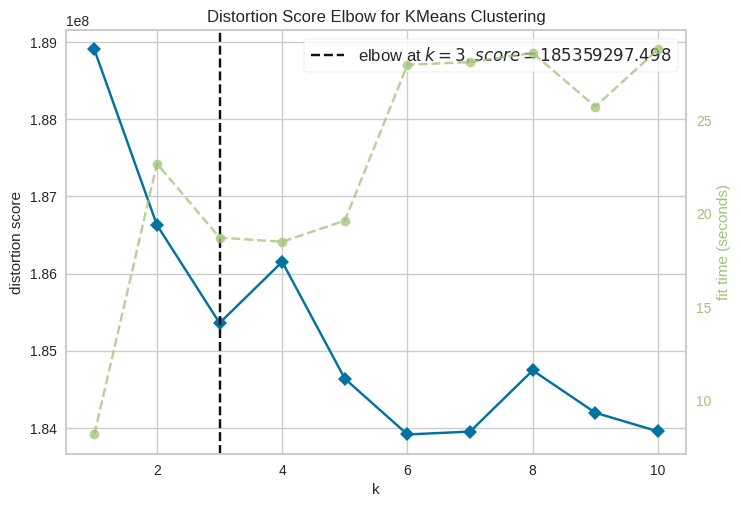

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [22]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=10)

# call fit method with data
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_

# cluster label for each data point
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


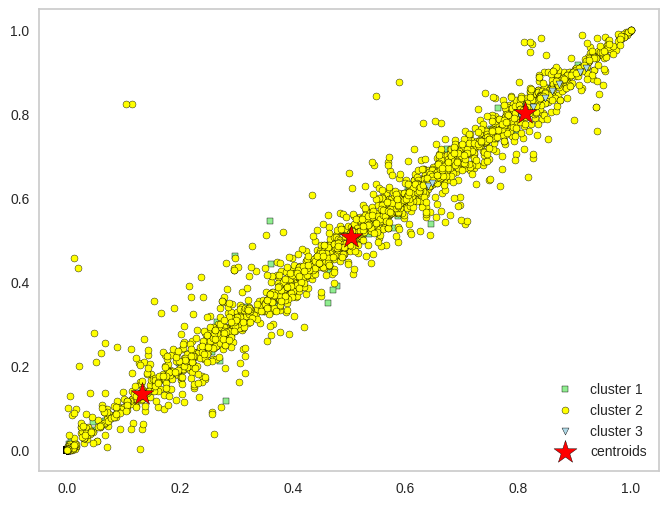

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [24]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 50.42%


In [25]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 50.25%
The purity score for squared euclidean distance is 50.25%
The purity score for manhattan distance is 64.57%
The purity score for chebyshev distance is 50.04%
The purity score for canberra distance is 63.03%
The purity score for chi-square distance is 50.0%


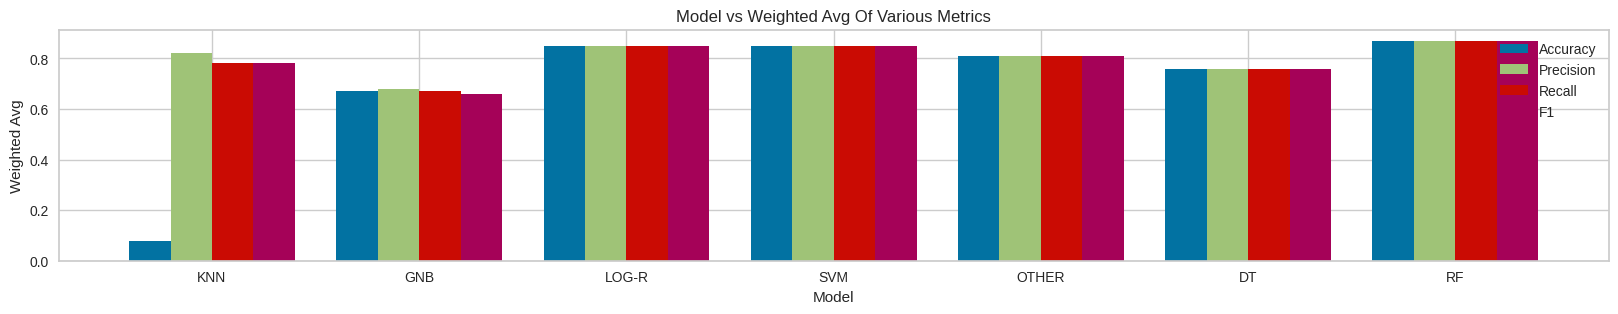

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'GNB', 'LOG-R', 'SVM', 'OTHER', 'DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.078, 0.67, 0.85, 0.85, 0.81, 0.76, 0.87]
precision = [0.82, 0.68, 0.85, 0.85, 0.81, 0.76, 0.87]
recall = [0.78, 0.67, 0.85, 0.85, 0.81, 0.76, 0.87]
f1 = [0.78, 0.66, 0.85, 0.85, 0.81, 0.76, 0.87]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

In [ ]:
#Reference: Professor's lectures notes